# Challenge info

Abstract: Human Activity Recognition database built from the recordings of 30 subjects performing activities of daily living (ADL) while carrying a waist-mounted smartphone with embedded inertial sensors.

The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person performed six activities (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone (Samsung Galaxy S II) on the waist. Using its embedded accelerometer and gyroscope, we captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz. The experiments have been video-recorded to label the data manually. The obtained dataset has been randomly partitioned into two sets, where 70% of the volunteers was selected for generating the training data and 30% the test data.

The sensor signals (accelerometer and gyroscope) were pre-processed by applying noise filters and then sampled in fixed-width sliding windows of 2.56 sec and 50% overlap (128 readings/window). The sensor acceleration signal, which has gravitational and body motion components, was separated using a Butterworth low-pass filter into body acceleration and gravity. The gravitational force is assumed to have only low frequency components, therefore a filter with 0.3 Hz cutoff frequency was used. From each window, a vector of features was obtained by calculating variables from the time and frequency domain.

# Constants

In [ ]:
C_PATH_GOOGLE_ROOT = "/content/drive"

C_PATH_X_TRAIN = "/content/drive/MyDrive/Projects/HARUSD/X_train.txt"
C_PATH_Y_TRAIN = "/content/drive/MyDrive/Projects/HARUSD/y_train.txt"
C_PATH_X_TEST = "/content/drive/MyDrive/Projects/HARUSD/X_test.txt"
C_PATH_Y_TEST = "/content/drive/MyDrive/Projects/HARUSD/y_test.txt"

# Load

## Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import metrics
from datetime import datetime

from google.colab import drive

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
from keras.utils import to_categorical

import warnings
warnings.filterwarnings("ignore")

## Mounting Google drive

How to acess files in Google drive:

https://colab.research.google.com/notebooks/io.ipynb#scrollTo=c2W5A2px3doP

In [ ]:
drive.mount(C_PATH_GOOGLE_ROOT)

Mounted at /content/drive


## Load data

In [ ]:
X_train = pd.read_csv(C_PATH_X_TRAIN, header=None, delim_whitespace=True)
y_train = pd.read_csv(C_PATH_Y_TRAIN, header=None, delim_whitespace=True)

In [ ]:
X_test = pd.read_csv(C_PATH_X_TEST, header=None, delim_whitespace=True)
y_test = pd.read_csv(C_PATH_Y_TEST, header=None, delim_whitespace=True)

## Unmounting Google drive

In [ ]:
drive.flush_and_unmount()

# Basic exploratory data analysis

## Train data

In [ ]:
display(X_train.head())
print(X_train.shape)

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


(7352, 561)


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, 0 to 560
dtypes: float64(561)
memory usage: 31.5 MB


In [ ]:
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,0.125293,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.250994,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.023692,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,0.134000,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,0.289096,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.946700,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000


In [ ]:
# Null values
X_train.columns[X_train.isna().sum() >= 1]

Int64Index([], dtype='int64')

In [ ]:
# Null values
y_train.isna().sum()

0    0
dtype: int64

In [ ]:
# Duplicates
X_train[X_train.duplicated()]

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560


In [ ]:
y_train.dtypes

0    int64
dtype: object

In [ ]:
# Add column - numerical category

label_numerical = {
  1:"Walking",
  2:"Walikng Upstairs",
  3:"Walking Downstairs",
  4:"Sitting",
  5:"Standing",
  6:"Laying"
}

X_train["label_numerical"] = y_train[0]
X_train["label_numerical"] = X_train["label_numerical"].map(label_numerical)

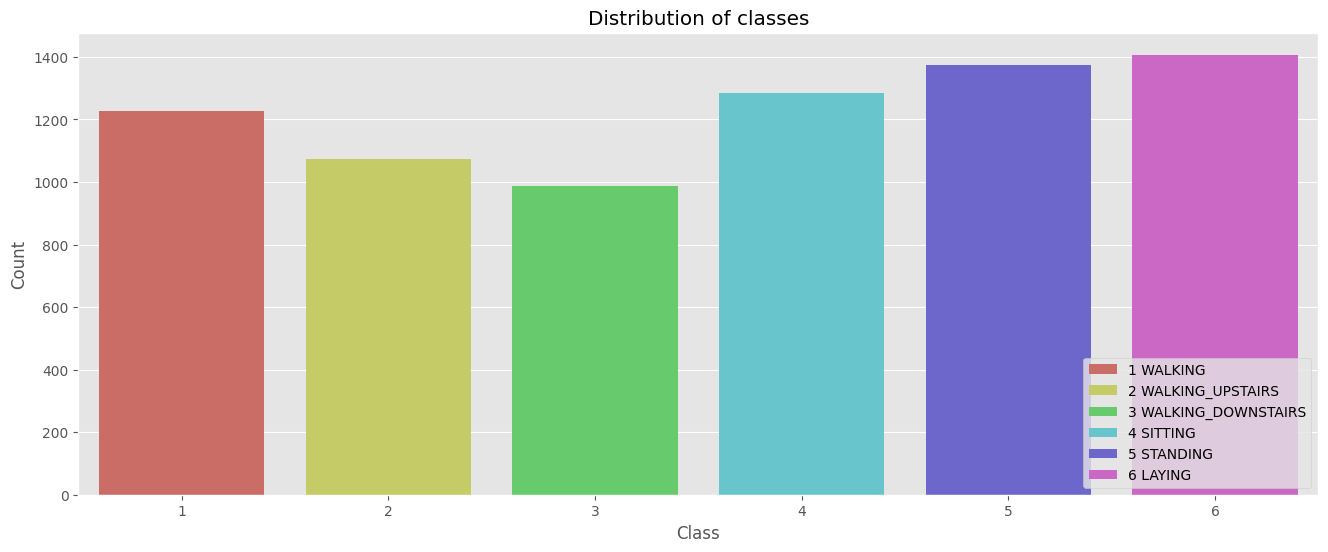

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(16,6))
sns.countplot(
  x=0,
  data=y_train,
  label=['1 WALKING', '2 WALKING_UPSTAIRS', '3 WALKING_DOWNSTAIRS', '4 SITTING', '5 STANDING', '6 LAYING'],
  palette=sns.color_palette("hls")
)
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Distribution of classes")
plt.legend(loc='lower right')
plt.show()

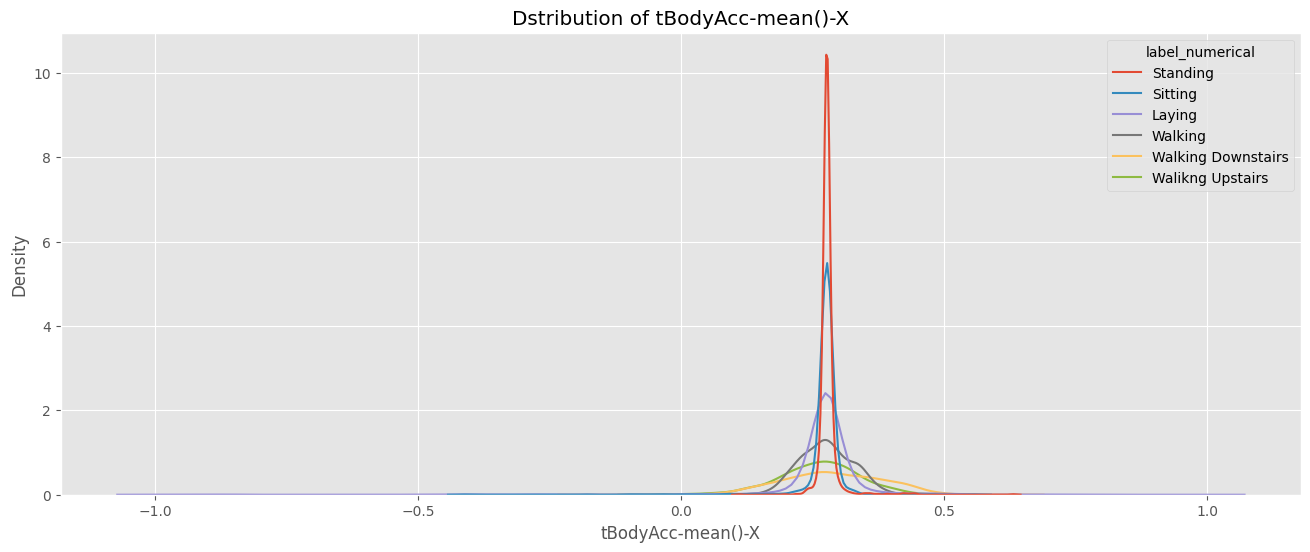

In [ ]:
plt.figure(figsize=(16,6))
sns.kdeplot(x=0,data=X_train, hue="label_numerical")
plt.title("Dstribution of tBodyAcc-mean()-X")
plt.xlabel("tBodyAcc-mean()-X")
plt.show()

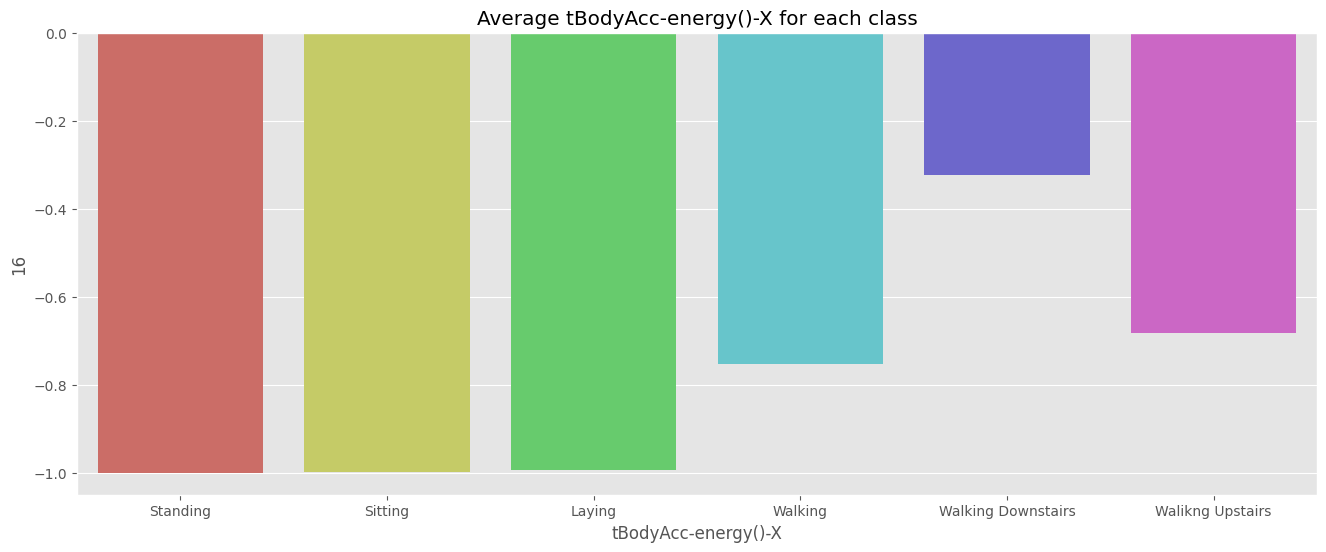

In [ ]:
plt.figure(figsize=(16,6))
sns.barplot(x="label_numerical",y=16,data=X_train,ci=False, palette=sns.color_palette("hls"))
plt.title("Average tBodyAcc-energy()-X for each class")
plt.xlabel("tBodyAcc-energy()-X")
plt.show()

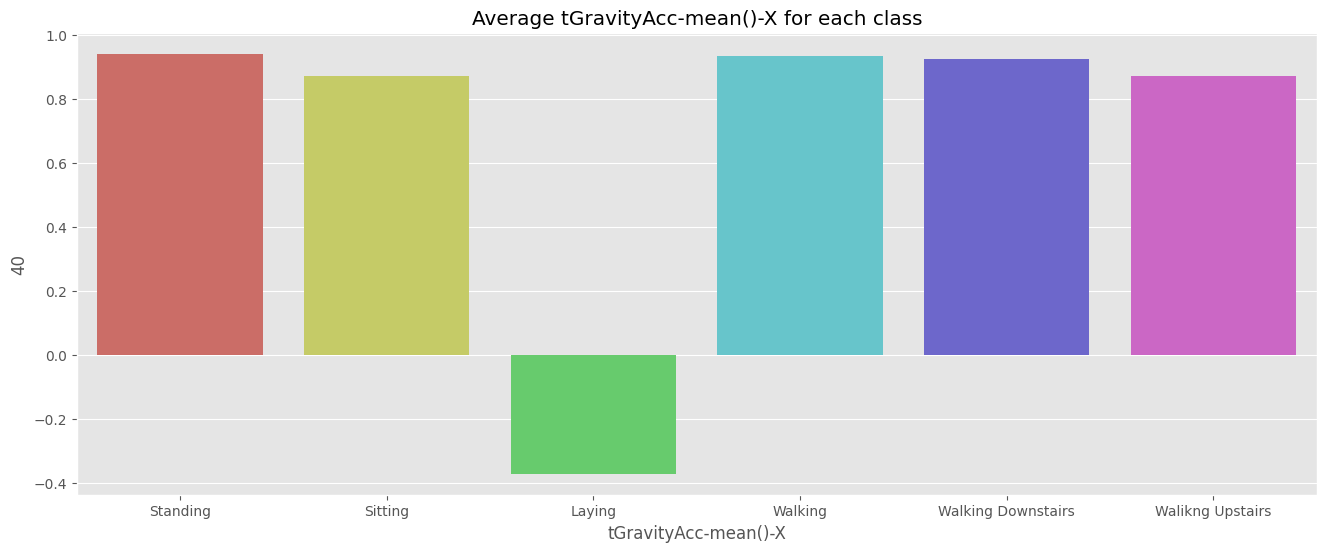

In [ ]:
plt.figure(figsize=(16,6))
sns.barplot(x="label_numerical",y=40,data=X_train,ci=False, palette=sns.color_palette("hls"))
plt.title("Average tGravityAcc-mean()-X for each class")
plt.xlabel("tGravityAcc-mean()-X")
plt.show()

## Test data

In [ ]:
X_test.head()
X_test.shape

(2947, 561)

In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Columns: 561 entries, 0 to 560
dtypes: float64(561)
memory usage: 12.6 MB


In [ ]:
X_test.describe()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
count,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,...,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000
mean,0.273996,-0.017863,-0.108386,-0.613635,-0.508330,-0.633797,-0.641278,-0.522676,-0.637038,-0.462063,...,0.130236,-0.277593,-0.598756,0.005264,0.003799,0.040029,-0.017298,-0.513923,0.074886,-0.048720
std,0.060570,0.025745,0.042747,0.412597,0.494269,0.362699,0.385199,0.479899,0.357753,0.523916,...,0.231018,0.317245,0.311042,0.336147,0.445077,0.634989,0.501311,0.509205,0.324300,0.241467
min,-0.592004,-0.362884,-0.576184,-0.999606,-1.000000,-0.998955,-0.999417,-0.999914,-0.998899,-0.952357,...,-0.785543,-1.000000,-1.000000,-1.000000,-0.993402,-0.998898,-0.991096,-0.984195,-0.913704,-0.949228
25%,0.262075,-0.024961,-0.121162,-0.990914,-0.973664,-0.976122,-0.992333,-0.974131,-0.975352,-0.934447,...,-0.008433,-0.517494,-0.829593,-0.130541,-0.282600,-0.518924,-0.428375,-0.829722,0.022140,-0.098485
50%,0.277113,-0.016967,-0.108458,-0.931214,-0.790972,-0.827534,-0.937664,-0.799907,-0.817005,-0.852659,...,0.142676,-0.311023,-0.683672,0.005188,0.006767,0.047113,-0.026726,-0.729648,0.181563,-0.010671
75%,0.288097,-0.010143,-0.097123,-0.267395,-0.105919,-0.311432,-0.321719,-0.133488,-0.322771,-0.009965,...,0.288320,-0.083559,-0.458332,0.146200,0.288113,0.622151,0.394387,-0.545939,0.260252,0.092373
max,0.671887,0.246106,0.494114,0.465299,1.000000,0.489703,0.439657,1.000000,0.427958,0.786436,...,1.000000,1.000000,1.000000,0.998898,0.986347,1.000000,1.000000,0.833180,1.000000,0.973113


In [ ]:
# Null values
X_test.columns[X_test.isna().sum() >= 1]

Int64Index([], dtype='int64')

In [ ]:
# Null values
y_test.isna().sum()

0    0
dtype: int64

In [ ]:
# Duplicates
X_test[X_test.duplicated()]

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560


In [ ]:
y_test.value_counts()

6    537
5    532
1    496
4    491
2    471
3    420
dtype: int64

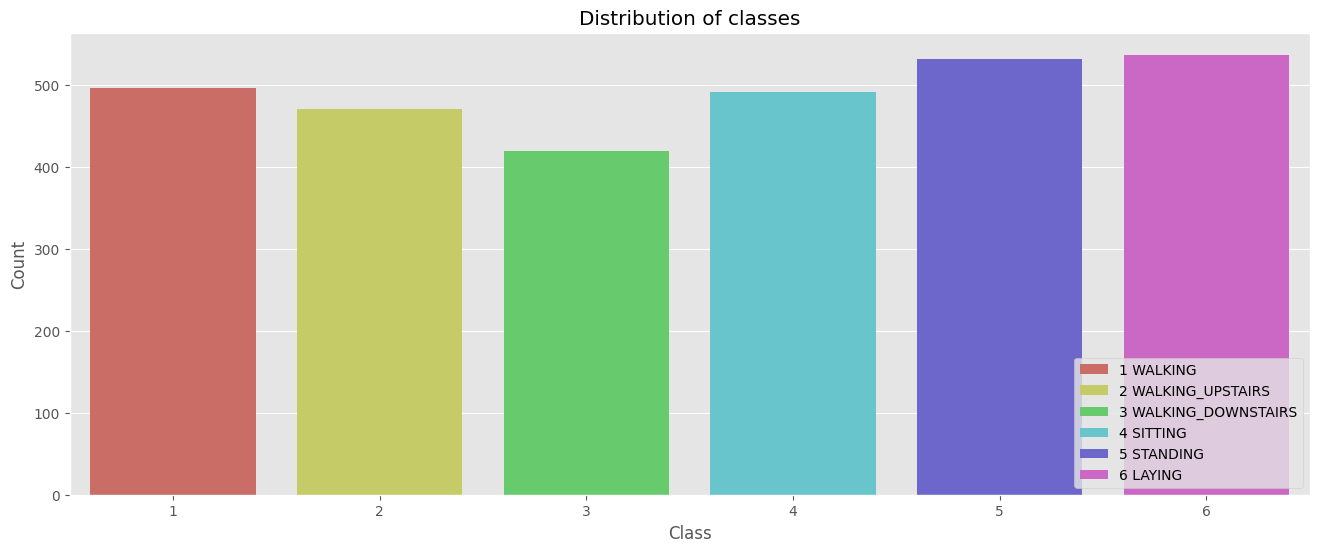

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(16,6))
sns.countplot(
  x=0,
  data=y_test,
  label=['1 WALKING', '2 WALKING_UPSTAIRS', '3 WALKING_DOWNSTAIRS', '4 SITTING', '5 STANDING', '6 LAYING'],
  palette=sns.color_palette("hls")
)
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Distribution of classes")
plt.legend(loc='lower right')
plt.show()

# Data preparation

In [ ]:
# Remove artificially created column label_numerical
X_train.drop("label_numerical", axis=1, inplace=True)

In [ ]:
# scaling training and testing data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

- Data is already normalised. Each column to range ~ [-1, 1]

- There are no Null values

- There are no duplicates

# Models

## K-nearest neighbors

In [ ]:
t1 = datetime.now()

# Initiate model
knn = KNeighborsClassifier()

# Model training
knn.fit(X_train,y_train)

# Predict on testing data
y_pred_knn = knn.predict(X_test)

# Calculate model accuracy
acc_score_knn = metrics.accuracy_score(y_test,y_pred_knn)

print("KNN accuracy = {}".format(acc_score_knn))

t2 = datetime.now()
delta_knn = t2 - t1
print(f"Training took seconds: {delta_knn.total_seconds()}")

KNN accuracy = 0.9015948422124194
Training took seconds: 1.032815


In [ ]:
# Classification report
cr_knn = metrics.classification_report(y_test,y_pred_knn)

print("KNN classification report")
print(cr_knn)

KNN classification report
              precision    recall  f1-score   support

           1       0.85      0.98      0.91       496
           2       0.89      0.90      0.90       471
           3       0.95      0.79      0.86       420
           4       0.91      0.79      0.85       491
           5       0.83      0.93      0.88       532
           6       1.00      0.99      1.00       537

    accuracy                           0.90      2947
   macro avg       0.91      0.90      0.90      2947
weighted avg       0.91      0.90      0.90      2947



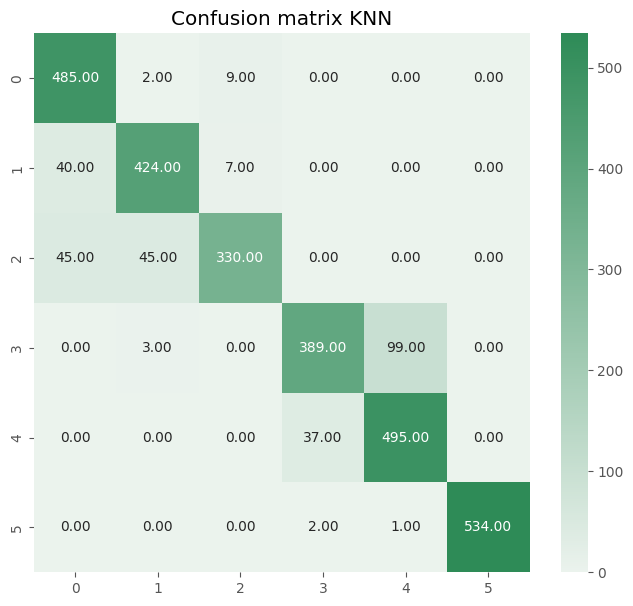

In [ ]:
# Confusion matrix
cm_knn = metrics.confusion_matrix(y_test,y_pred_knn)

plt.figure(figsize=(8,7))
sns.heatmap(cm_knn,annot=True,fmt=".2f",cmap=sns.light_palette("seagreen", as_cmap=True))
plt.title("Confusion matrix KNN")
plt.show()

## Decision tree classifier

In [ ]:
t1 = datetime.now()

# Initiate model
dtc = DecisionTreeClassifier()

# Model training
dtc.fit(X_train,y_train)

# Predict on testing data
y_pred_dtc = dtc.predict(X_test)

# Calculate model accuracy
acc_score_dtc = metrics.accuracy_score(y_test,y_pred_dtc)

print("DTC accuracy = {}".format(acc_score_dtc))

t2 = datetime.now()
delta_dtc = t2 - t1
print(f"Training took seconds: {delta_dtc.total_seconds()}")

DTC accuracy = 0.8618934509670851
Training took seconds: 5.963674


In [ ]:
# Classification report
cr_dtc = metrics.classification_report(y_test,y_pred_dtc)

print("Classification Report of DTC")
print(cr_dtc)

Classification Report of DTC
              precision    recall  f1-score   support

           1       0.83      0.90      0.86       496
           2       0.81      0.79      0.80       471
           3       0.89      0.83      0.86       420
           4       0.84      0.77      0.80       491
           5       0.80      0.87      0.83       532
           6       1.00      1.00      1.00       537

    accuracy                           0.86      2947
   macro avg       0.86      0.86      0.86      2947
weighted avg       0.86      0.86      0.86      2947



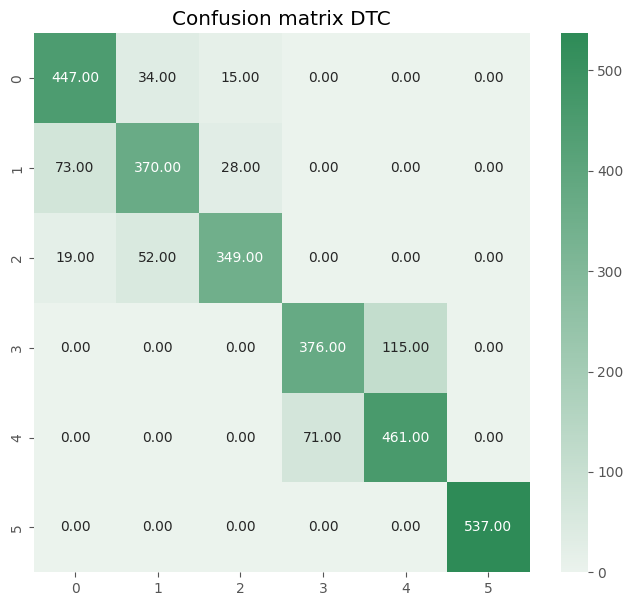

In [ ]:
# Confusion matrix
cm_dtc = metrics.confusion_matrix(y_test,y_pred_dtc)

plt.figure(figsize=(8,7))
sns.heatmap(cm_dtc,annot=True,fmt=".2f",cmap=sns.light_palette("seagreen", as_cmap=True))
plt.title("Confusion matrix DTC")
plt.show()

## Random forest classifier

In [ ]:
t1 = datetime.now()

# Initiate model
rfc = RandomForestClassifier()

# Model training
rfc.fit(X_train,y_train)

# Predict on testing data
y_pred_rfc = rfc.predict(X_test)

# Calculate model accuracy
acc_score_rfc = metrics.accuracy_score(y_test,y_pred_rfc)

print("RFC accuracy = {}".format(acc_score_rfc))

t2 = datetime.now()
delta_rfc = t2 - t1
print(f"Training took seconds: {delta_rfc.total_seconds()}")

RFC accuracy = 0.9239904988123515
Training took seconds: 14.420045


In [ ]:
# Classification report
cr_rfc = metrics.classification_report(y_test,y_pred_rfc)

print("Classification Report of RFC")
print(cr_rfc)

Classification Report of RFC
              precision    recall  f1-score   support

           1       0.90      0.97      0.93       496
           2       0.89      0.90      0.89       471
           3       0.96      0.85      0.90       420
           4       0.91      0.89      0.90       491
           5       0.90      0.92      0.91       532
           6       1.00      1.00      1.00       537

    accuracy                           0.92      2947
   macro avg       0.92      0.92      0.92      2947
weighted avg       0.93      0.92      0.92      2947



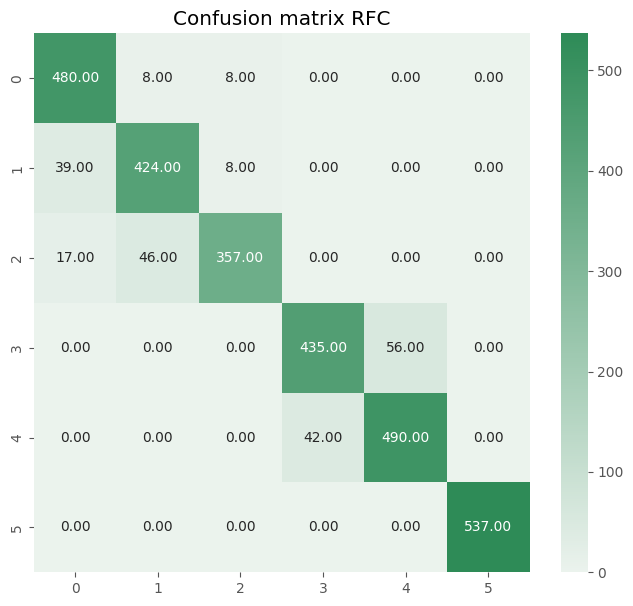

In [ ]:
# Confusion matrix
cm_rfc = metrics.confusion_matrix(y_test,y_pred_rfc)

plt.figure(figsize=(8,7))
sns.heatmap(cm_rfc,annot=True,fmt=".2f",cmap=sns.light_palette("seagreen", as_cmap=True))
plt.title("Confusion matrix RFC")
plt.show()

## Gradient boosting classifier

In [ ]:
t1 = datetime.now()

# Initiate model
gbc = GradientBoostingClassifier()

# Model training
gbc.fit(X_train,y_train)

# Predict on testing data
y_pred_gbc = gbc.predict(X_test)

# Calculate model accuracy
acc_score_gbc = metrics.accuracy_score(y_test,y_pred_gbc)

print("GBC accuracy = {}".format(acc_score_gbc))

t2 = datetime.now()
delta_gbc = t2 - t1
print(f"Training took seconds: {delta_gbc.total_seconds()}")

GBC accuracy = 0.9389209365456397
Training took seconds: 954.84795


In [ ]:
# Classification report
cr_gbc = metrics.classification_report(y_test,y_pred_gbc)

print("Classification Report of GBC")
print(cr_gbc)

Classification Report of GBC
              precision    recall  f1-score   support

           1       0.93      0.98      0.96       496
           2       0.92      0.93      0.93       471
           3       0.97      0.92      0.95       420
           4       0.93      0.85      0.89       491
           5       0.88      0.95      0.91       532
           6       1.00      1.00      1.00       537

    accuracy                           0.94      2947
   macro avg       0.94      0.94      0.94      2947
weighted avg       0.94      0.94      0.94      2947



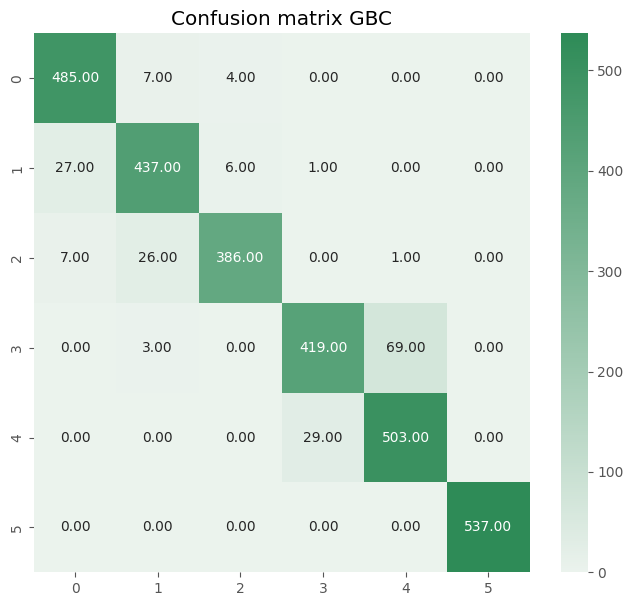

In [ ]:
# Confusion matrix
cm_gbc = metrics.confusion_matrix(y_test,y_pred_gbc)

plt.figure(figsize=(8,7))
sns.heatmap(cm_gbc,annot=True,fmt=".2f",cmap=sns.light_palette("seagreen", as_cmap=True))
plt.title("Confusion matrix GBC")
plt.show()

## SVC

In [ ]:
t1 = datetime.now()

# Initiate model
svc = SVC()

# Model training
svc.fit(X_train,y_train)

# Predict on testing data
y_pred_svc = svc.predict(X_test)

# Calculate model accuracy
acc_score_svc = metrics.accuracy_score(y_test,y_pred_svc)

print("Accuracy score of SVC on test data is {}".format(acc_score_svc))

t2 = datetime.now()
delta_svc = t2 - t1
print(f"Training took seconds: {delta_svc.total_seconds()}")

Accuracy score of SVC on test data is 0.9504580929759077
Training took seconds: 5.668137


In [ ]:
# Classification report
cr_svc = metrics.classification_report(y_test,y_pred_svc)

print("Classification Report of SVC")
print(cr_svc)

Classification Report of SVC
              precision    recall  f1-score   support

           1       0.94      0.98      0.96       496
           2       0.93      0.96      0.94       471
           3       0.99      0.91      0.95       420
           4       0.94      0.89      0.91       491
           5       0.91      0.95      0.93       532
           6       1.00      1.00      1.00       537

    accuracy                           0.95      2947
   macro avg       0.95      0.95      0.95      2947
weighted avg       0.95      0.95      0.95      2947



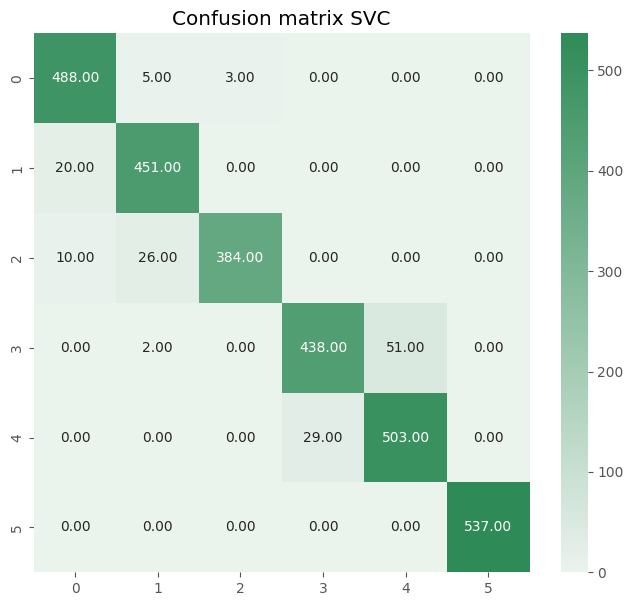

In [ ]:
# Confusion matrix
cm_svc = metrics.confusion_matrix(y_test,y_pred_svc)

plt.figure(figsize=(8,7))
sns.heatmap(cm_svc,annot=True,fmt=".2f",cmap=sns.light_palette("seagreen", as_cmap=True))
plt.title("Confusion matrix SVC")
plt.show()

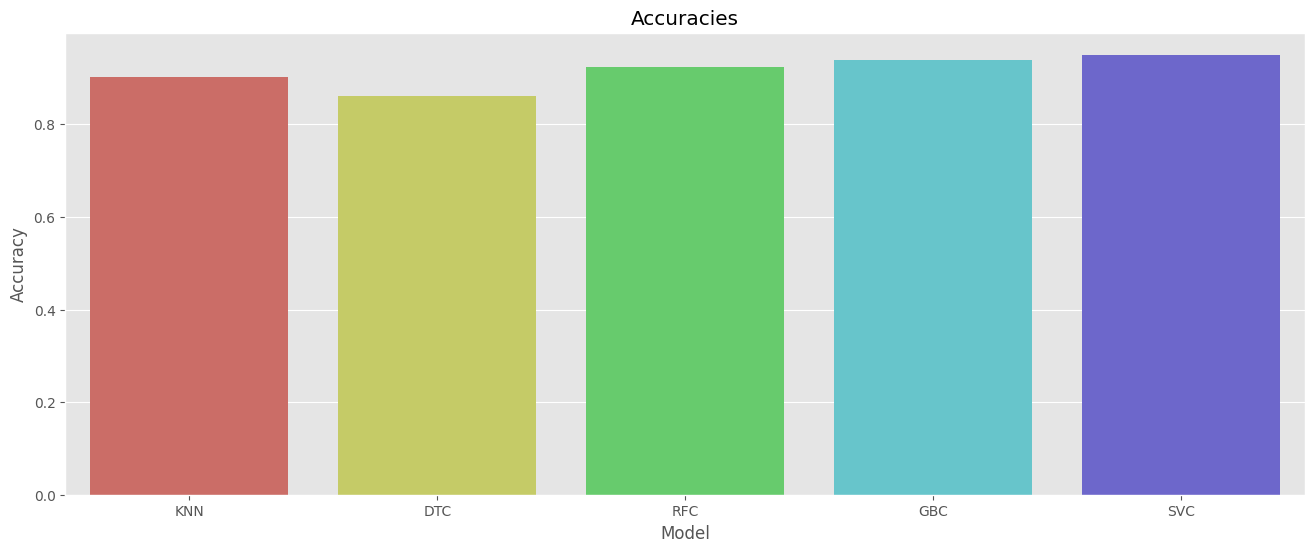

In [ ]:
# Accuracies of all models
model_name = ["KNN","DTC","RFC","GBC","SVC"]
models_accuracy = [acc_score_knn,acc_score_dtc,acc_score_rfc,acc_score_gbc,acc_score_svc]

plt.figure(figsize=(16,6))
sns.barplot(x = model_name, y = models_accuracy, palette=sns.color_palette("hls"))
plt.title("Accuracies")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.show()

Support vector classifier performed the best among all models

## SVC hyperparameter tuning

In [ ]:
svc = SVC()

# Setting hyperparameters
param = {
    "C":[0.8,1,1.2],
    "kernel":["linear","poly","rbf"],
    "gamma":["scale","auto"]
  }

# Grid search
gs_svc = GridSearchCV(svc,param_grid=param,cv=3)

# Do grid search
gs_svc.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.8, 1, 1.2], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf']})

In [ ]:
# The best hyperparameters of grid search
print(gs_svc.best_params_)

{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}


In [ ]:
# The best score of grid search
print(gs_svc.best_score_)

0.943826676325365


SVC performed better with default parameters.

## Deep learning

In [ ]:
t1 = datetime.now()

# Define the input shape
n_timesteps, n_features = X_train.shape[1], 1

# Reshaping the data for the CNN model
X_train2 = X_train.values.reshape((X_train.shape[0], n_timesteps, n_features))
X_test2 = X_test.values.reshape((X_test.shape[0], n_timesteps, n_features))

# Converting the labels to one-hot encoding
y_train2 = to_categorical(y_train)
y_test2 = to_categorical(y_test)

# Create the CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps, n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(y_train2.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Trainning the CNN model
history = model.fit(X_train2, y_train2, epochs=10, batch_size=64, validation_data=(X_test2, y_test2))

# Evaluating the CNN model
y_pred = history.model.predict(X_test2)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test2, axis=1)
print('Accuracy:', metrics.accuracy_score(y_test_classes, y_pred_classes))
print('Confusion matrix:\n', metrics.confusion_matrix(y_test_classes, y_pred_classes))
print('Classification report:\n', metrics.classification_report(y_test_classes, y_pred_classes))

t2 = datetime.now()
delta_nn = t2 - t1
print(f"Training took seconds: {delta_nn.total_seconds()}")

Epoch 1/10
115/115 [==============================] - 20s 160ms/step - loss: 0.3992 - accuracy: 0.8402 - val_loss: 0.2238 - val_accuracy: 0.9250
Epoch 2/10
115/115 [==============================] - 18s 155ms/step - loss: 0.0808 - accuracy: 0.9709 - val_loss: 0.1574 - val_accuracy: 0.9403
Epoch 3/10
115/115 [==============================] - 20s 176ms/step - loss: 0.0565 - accuracy: 0.9791 - val_loss: 0.1629 - val_accuracy: 0.9474
Epoch 4/10
115/115 [==============================] - 20s 170ms/step - loss: 0.0630 - accuracy: 0.9785 - val_loss: 0.1740 - val_accuracy: 0.9460
Epoch 5/10
115/115 [==============================] - 19s 166ms/step - loss: 0.0343 - accuracy: 0.9863 - val_loss: 0.1181 - val_accuracy: 0.9576
Epoch 6/10
115/115 [==============================] - 18s 154ms/step - loss: 0.0247 - accuracy: 0.9908 - val_loss: 0.1354 - val_accuracy: 0.9596
Epoch 7/10
115/115 [==============================] - 18s 154ms/step - loss: 0.0287 - accuracy: 0.9895 - val_loss: 0.1295 - val_ac

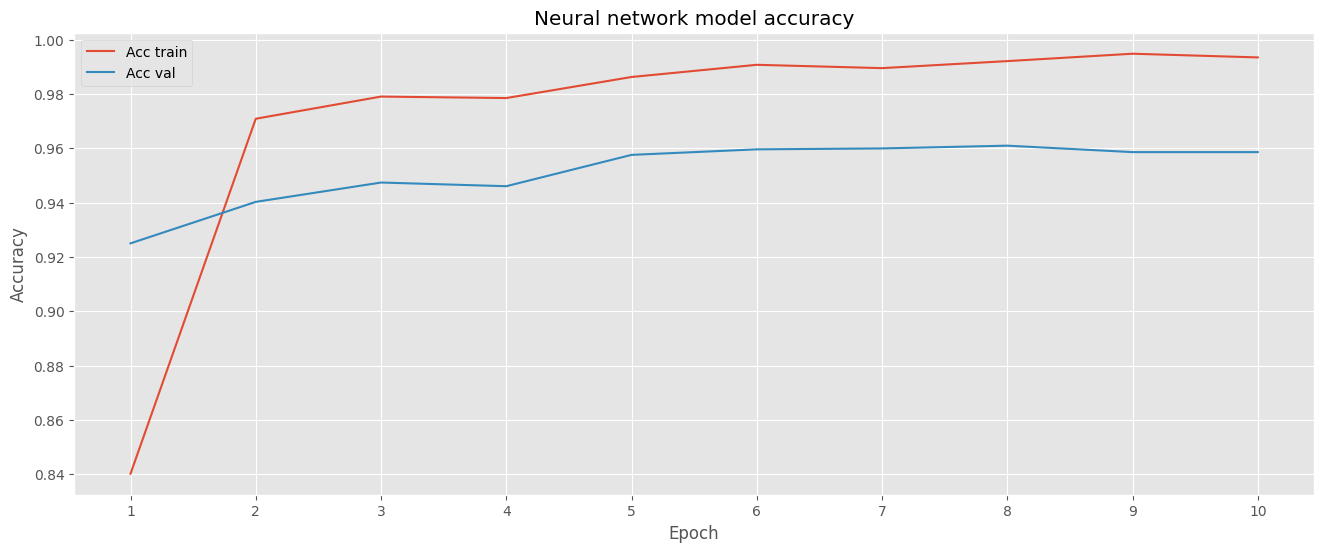

In [ ]:
plt.figure(figsize=(16,6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xticks(np.arange(len(history.history['val_accuracy'])), np.arange(1, len(history.history['val_accuracy'])+1))
plt.title('Neural network model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Acc train', 'Acc val'], loc='upper left')
plt.show()

In this code, we first load the four data files using pandas read_csv function. We then define the input shape for the CNN model, and reshape the input data accordingly. The labels are also converted to one-hot encoding using the to_categorical function.

We then define the CNN model architecture, which consists of two convolutional layers, a max pooling layer, a flatten layer, and two dense layers. The model is compiled with the categorical crossentropy loss function and the Adam optimizer. We then train the model for 10 epochs using a batch size of 64.

By using the deep learning model of 10 epochs we reached: accuracy of 98.50% and val accuracy of 95.69% after 7 epochs.

# Conclusions

Durign this research 6 machine learning methods were implemented/models trained:
- K-nearest neighbors
- Decision tree classifier
- Random forest classifier
- Gradient boosting classifier
- Support vector classifier
- Deep learning (convolutional neural network)

SVC and deep learning showed the best results with quite decent accuracies, more than 95% each.

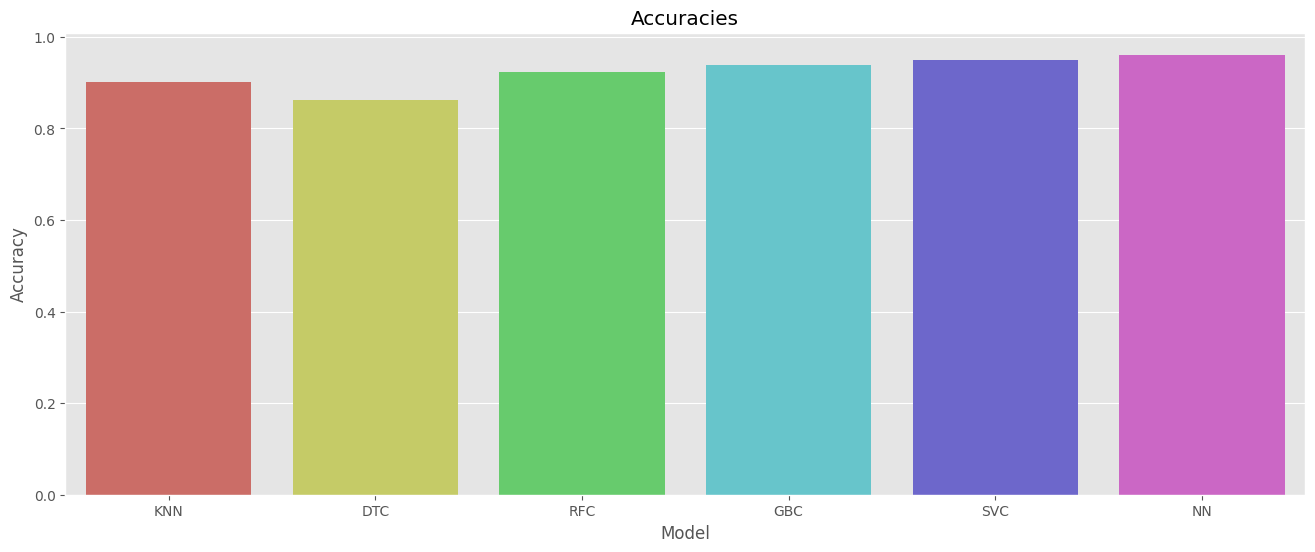

In [ ]:
# Accuracies of all models

acc_score_nn = max(history.history['val_accuracy'])

model_name = ["KNN","DTC","RFC","GBC","SVC", "NN"]
models_accuracy = [acc_score_knn,acc_score_dtc,acc_score_rfc,acc_score_gbc,acc_score_svc,acc_score_nn]

plt.figure(figsize=(16,6))
sns.barplot(x = model_name, y = models_accuracy, palette=sns.color_palette("hls"))

plt.title("Accuracies")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.show()

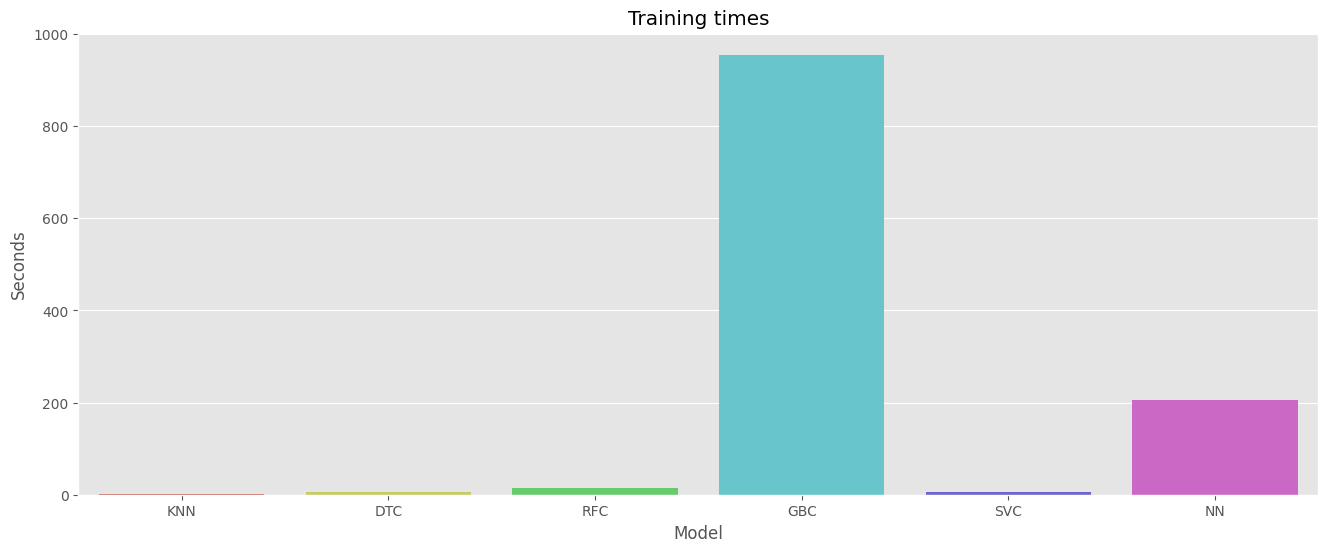

In [ ]:
# Training time of all models

model_name = ["KNN","DTC","RFC","GBC","SVC", "NN"]
models_training_time = [delta_knn,delta_dtc,delta_rfc,delta_gbc,delta_svc,delta_nn]
models_training_time = [x.total_seconds() for x in models_training_time]

plt.figure(figsize=(16,6))
sns.barplot(x = model_name, y = models_training_time, palette=sns.color_palette("hls"))

plt.title("Training times")
plt.xlabel("Model")
plt.ylabel("Seconds")
plt.show()